In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
import os
all_dfs = []
directory = os.fsencode("data/")
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".csv"): 
         all_dfs.append(pd.read_csv("data/" + filename, header=None))

In [25]:
df1_0 = pd.read_csv("data/01-0.csv", header=None)
df1_5 = pd.read_csv("data/01-5.csv", header=None)
df1_10 = pd.read_csv("data/01-10.csv", header=None)
df2_0 = pd.read_csv("data/02-0.csv", header=None)
df2_5 = pd.read_csv("data/02-5.csv", header=None)
df2_10 = pd.read_csv("data/02-10.csv", header=None)

In [3]:
data = pd.concat(all_dfs) # [df1_0, df1_5, df1_10, df2_0, df2_5, df2_10])
data

,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,14400
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.350746,0.299145,0.190909,0.079208,0.090000,0.000000,0.044944,0.011765,0.077778,0.000000
1,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.273504,0.401575,0.357143,0.278261,0.232759,0.174757,0.088235,0.079208,0.020000,0.084211
2,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.168142,0.341270,0.217391,0.233645,0.269231,0.326923,0.323529,0.410526,0.343434,0.269663
3,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.467742,0.516667,0.382609,0.441176,0.525253,0.638298,0.744444,0.802198,0.670103,0.577778
4,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.339130,0.552000,0.464912,0.407407,0.451923,0.458333,0.384615,0.326923,0.351648,0.357895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,5.0,0.781915,0.778947,0.807292,0.831579,0.848168,0.851852,0.888889,0.884211,0.895288,...,0.106599,0.060000,0.030928,0.054187,0.065728,0.037037,0.036036,0.071111,0.066390,0.051793
40,5.0,0.793814,0.806122,0.818653,0.835052,0.848958,0.869565,0.870270,0.878453,0.895028,...,0.160804,0.070000,0.025253,0.064677,0.047393,0.059908,0.022624,0.064516,0.050209,0.063492
41,5.0,0.805825,0.803109,0.835052,0.840206,0.854167,0.868421,0.871795,0.866310,0.887097,...,0.228856,0.039801,0.069307,0.062500,0.051887,0.094170,0.040541,0.045045,0.065844,0.131474
42,5.0,0.817259,0.828283,0.837563,0.851282,0.852792,0.841270,0.862434,0.868421,0.877551,...,0.092683,0.069767,0.052381,0.045872,0.061947,0.048889,0.043825,0.055777,0.031873,0.079681


In [4]:
X = data.iloc[:, [i for i in range(1, 14401)]]
Y = data.iloc[:, 0]

In [5]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2 = pca.fit_transform(X)
X_Train2 = pca.fit_transform(X_Train)
X_Test2 = pca.fit_transform(X_Test)

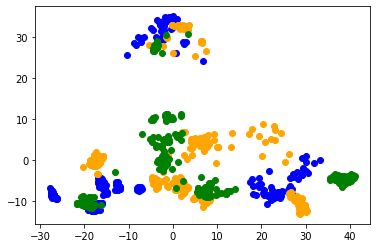

In [7]:
zeroes = []
fives = []
tens = []
for i in range(0, len(Y)):
    if (Y.iloc[i] == 0):
        zeroes.append([X2[i][0], X2[i][1]])
    if (Y.iloc[i] == 5):
        fives.append([X2[i][0], X2[i][1]])
    if (Y.iloc[i] == 10):
        tens.append([X2[i][0], X2[i][1]])

zeroes = np.array(zeroes)
fives = np.array(fives)
tens = np.array(tens)

plt.scatter(zeroes[:, 0], zeroes[:, 1], color="blue")
plt.scatter(fives[:, 0], fives[:, 1], color="orange")
plt.scatter(tens[:, 0], tens[:, 1], color="green")

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = "poly")
classifier.fit(X_Train2, Y_Train)

SVC(kernel='poly')

In [16]:
from sklearn.metrics import accuracy_score
Y_Pred = classifier.predict(X_Test2)
accuracy = accuracy_score(Y_Test, Y_Pred)
accuracy

0.6095238095238096

Text(0.5, 1.0, 'SVM Decision Region Boundary')

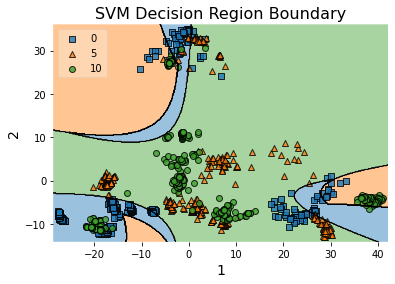

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X2, 
                      y=np.array(Y).astype(np.int64),
                      clf=classifier, 
                      legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)